In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
import pandas as pd
df = pd.read_csv("data_keystroke_dataset.csv")

# Features and labels
X = df.drop(columns=["label"]).values
y = df["label"].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train on only NORMAL samples (label=0)
X_train = X_scaled[y == 0]

# Dense Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 4

input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(16, activation="relu")(input_layer)
encoded = keras.layers.Dense(encoding_dim, activation="relu")(encoded)
decoded = keras.layers.Dense(16, activation="relu")(encoded)
decoded = keras.layers.Dense(input_dim, activation="sigmoid")(decoded)

autoencoder = keras.models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Train
autoencoder.fit(X_train, X_train, epochs=30, batch_size=32, validation_split=0.2)

# Save model
autoencoder.save("dense_autoencoder.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
tflite_model = converter.convert()
with open("dense_autoencoder.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0696 - val_loss: 0.0586
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - val_loss: 0.0449
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 - val_loss: 0.0331
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - val_loss: 0.0250
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - val_loss: 0.0206
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - val_loss: 0.0183
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - val_loss: 0.0172
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - val_loss: 0.0156
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - val_loss: 0.0139
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_l

Saved artifact at '/tmp/tmpumy3j3b4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132398647536400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647537360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647538320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647537168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647539472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647538512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647540048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398647539280: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Reshape for LSTM [samples, timesteps, features]
timesteps = 10
n_features = X_train.shape[1]
X_seq = []

for i in range(len(X_train) - timesteps):
    X_seq.append(X_train[i:i+timesteps])

X_seq = np.array(X_seq)

# LSTM Autoencoder
model = Sequential([
    LSTM(32, activation="relu", input_shape=(timesteps, n_features), return_sequences=False),
    RepeatVector(timesteps),
    LSTM(32, activation="relu", return_sequences=True),
    TimeDistributed(Dense(n_features))
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_seq, X_seq, epochs=20, batch_size=32, validation_split=0.2)

model.save("lstm_autoencoder.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_lstm = converter.convert()
with open("lstm_autoencoder.tflite", "wb") as f:
    f.write(tflite_lstm)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.1263 - val_loss: 0.0632
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0509 - val_loss: 0.0358
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0332 - val_loss: 0.0286
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0269 - val_loss: 0.0242
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0231 - val_loss: 0.0217
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - val_loss: 0.0203
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0191 - val_loss: 0.0187
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0187 - val_loss: 0.0183
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184 - val_loss: 0.0181
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0182 - val_loss: 0.0180
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0181 - val_l

Saved artifact at '/tmp/tmpa5vzpk4x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 7), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 10, 7), dtype=tf.float32, name=None)
Captures:
  132398643180560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643171920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643182288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643183056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643182480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643182096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643180368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132398643172688: TensorSpec(shape=(), dtype=tf.resource, name=None)


ConverterError: <unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_13171"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_13214"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_13171"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_13214"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False



Used the trained autoencoder to predict on the entire scaled dataset and calculate the mean squared error between the original and reconstructed data to get the reconstruction loss for each sample.



In [ ]:
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_losses = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step



Calculated the mean, standard deviation, and threshold for the normal reconstruction losses and print them.



In [ ]:
normal_losses = reconstruction_losses[y == 0]
mean_normal_loss = np.mean(normal_losses)
std_normal_loss = np.std(normal_losses)
threshold = mean_normal_loss + 2 * std_normal_loss

print(f"Mean of normal reconstruction losses: {mean_normal_loss:.4f}")
print(f"Standard deviation of normal reconstruction losses: {std_normal_loss:.4f}")
print(f"Determined anomaly detection threshold: {threshold:.4f}")

Mean of normal reconstruction losses: 0.0063
Standard deviation of normal reconstruction losses: 0.0038
Determined anomaly detection threshold: 0.0139


In [ ]:
y_pred = (reconstruction_losses > threshold).astype(int)


 accuracy, precision, recall, and F1-score using the true and predicted labels.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8090
Precision: 0.8769
Recall: 0.5059
F1-score: 0.6417



Generate the specified plots to visualize the distribution of reconstruction losses and the relationship between reconstruction loss and actual labels.



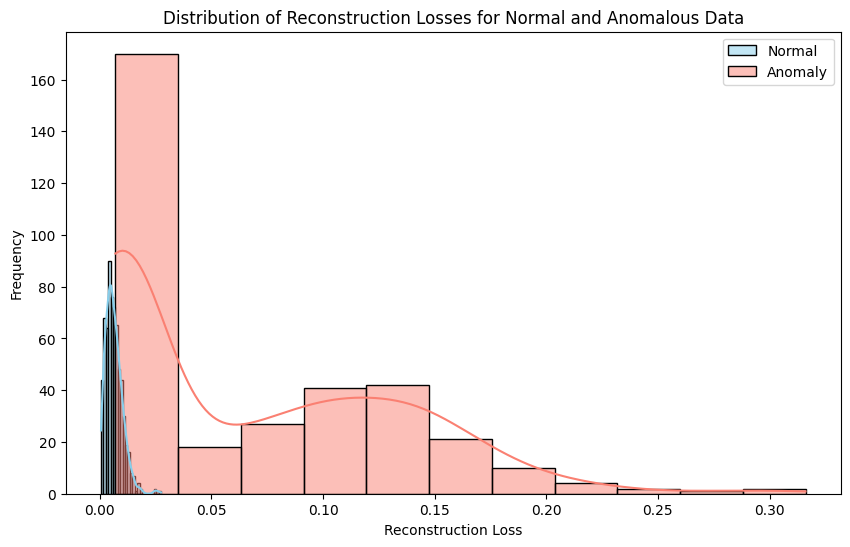

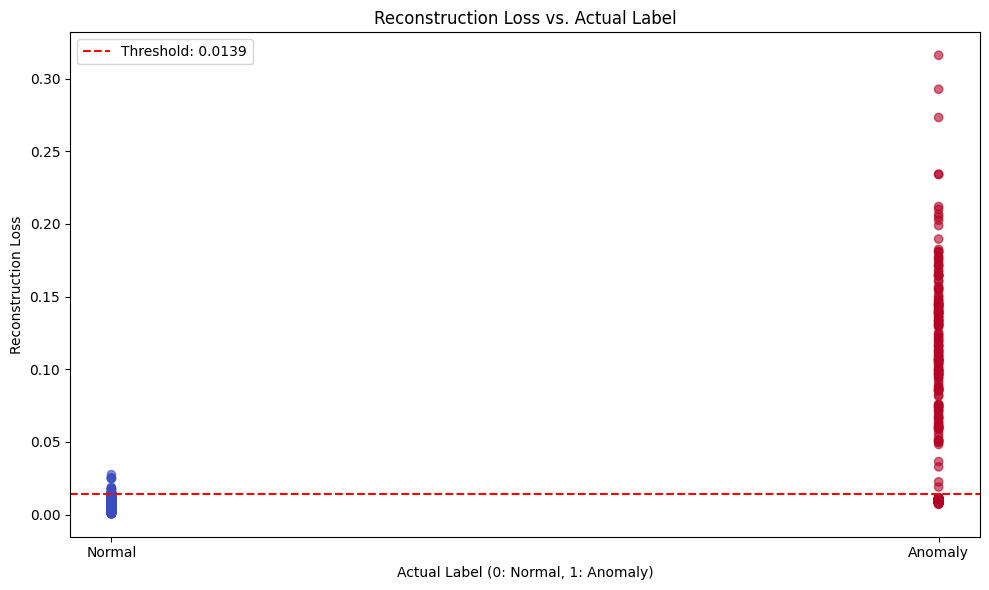

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of reconstruction losses
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_losses[y == 0], color='skyblue', label='Normal', kde=True)
sns.histplot(reconstruction_losses[y == 1], color='salmon', label='Anomaly', kde=True)
plt.xlabel("Reconstruction Loss")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Losses for Normal and Anomalous Data")
plt.legend()

# Scatter plot of reconstruction loss vs. actual label
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y, reconstruction_losses, c=y, cmap='coolwarm', alpha=0.6)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.xlabel("Actual Label (0: Normal, 1: Anomaly)")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss vs. Actual Label")
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.legend()

plt.tight_layout()
plt.show()



Accuracy: 0.8090 — the model correctly classified ~81% of cases.

Precision: 0.8769 — when the model flags an anomaly, it is correct ~87.7% of the time.

Recall: 0.5059 — it successfully detected ~50.6% of all anomalies.

F1-Score: 0.6417 — balanced measure of precision and recall.

Normal Data Stats: Mean reconstruction loss = 0.0063; Standard deviation = 0.0038.

Threshold: 0.0139, set as mean + 2 × standard deviation of normal reconstruction losses.

Visualization: Anomalous data shows higher reconstruction losses than normal data, with the threshold effectively separating the two.

Interpretation: High precision minimizes false positives, but moderate recall means some anomalies are missed.

Practical Insight: Best suited for applications where avoiding false alarms is critical; recall can be improved with further tuning.




